<a href="https://colab.research.google.com/github/HYUNMIN-HWANG/Colab/blob/main/OpenCV/OpenCV_17_FaceDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Course
# Full Tutorial with Python
link : https://www.youtube.com/watch?v=oXlwWbU8l2o

In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

people = ['PBG', 'LHL', 'KDW', 'Inoo', 'Amber']

p = []
for i in os.listdir(r'./MyDrive/MyDrive/Colab/OpenCV/people') :
    p.append(i)
print(p)    # ['PBG', 'LHL', 'KDW', 'Inoo', 'Amber']

DIR = r'./MyDrive/MyDrive/Colab/OpenCV/people'

haar_cascade = cv.CascadeClassifier('./MyDrive/MyDrive/Colab/OpenCV/haar_face.xml')

features = []   # faces
labels = []     # 누구의 것인지
def create_train() :
    for person in people :
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path) :
            img_path = os.path.join(path, img)

            img_array = cv.imread(img_path)
            if img_array is None :
                continue
                
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect :
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

create_train()

# print(f'Length of the features = {len(features)}')  # 27
# print(f'Length of the Labels = {len(labels)}')      # 27
print("Training Done -----------")

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Redognizer on the features list and the label list
face_recognizer.train(features, labels)

face_recognizer.save('./MyDrive/MyDrive/Colab/OpenCV/face_trained.ymal')
np.save('./MyDrive/MyDrive/Colab/OpenCV/features.npy', features)
np.save('./MyDrive/MyDrive/Colab/OpenCV/labels.npy', labels)


['PBG', 'LHL', 'KDW', 'Inoo', 'Amber']
Training Done -----------


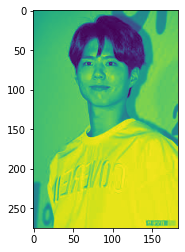

Label = PBG with a confidence of 0.0


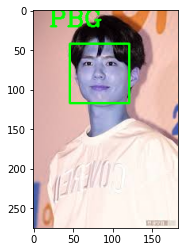

In [31]:
import numpy as np
import cv2 as cv

haar_cascade = cv.CascadeClassifier('./MyDrive/MyDrive/Colab/OpenCV/haar_face.xml')

people = ['PBG', 'LHL', 'KDW', 'Inoo', 'Amber']

# features = np.load('./MyDrive/MyDrive/Colab/OpenCV/features.npy')
# labels = np.load('./MyDrive/MyDrive/Colab/OpenCV/flabels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('./MyDrive/MyDrive/Colab/OpenCV/face_trained.ymal')

img = cv.imread(r'./MyDrive/MyDrive/Colab/OpenCV/people/PBG/images.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect :
    faces_roi = gray[y:y+h, x:x+h]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

plt.imshow(img)
plt.show()
